In [1]:
import xsimlab as xs
import xsaquacrop as ac
import numpy as np

In [2]:
import pandas

In [3]:
import elevation

In [4]:
import owslib

In [5]:
import xsaquacrop

In [6]:
soil = ac.SoilFromTexture(sand=.88,clay=.05,organic_matter=.025)

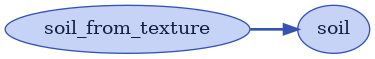

In [7]:
model = xs.Model({"soil":ac.Soil,"soil_from_texture":ac.SoilFromTexture})
model.visualize()

In [8]:
%load_ext xsimlab.ipython

In [9]:
# %create_setup model --default --verbose


ds_in = xs.create_setup(
    model=model,
    clocks={"main":np.arange(6)},
    input_vars={
        # Curve number for runoff calculations
        'soil__curve_number': np.array([30,32]),
        # Volumetric Sand content
        'soil_from_texture__sand': np.array([.88,.80]),
        # Volumetric Clay content
        'soil_from_texture__clay': np.array([.05,.05]),
        # Organic matter content
        'soil_from_texture__organic_matter': np.array([.025,.025]),
    },
    output_vars={'soil_from_texture__th_wp':"main"}
)


In [10]:
ds_in.xsimlab.run(model=model)

<xarray.Dataset>
Dimensions:                            (main: 6, z: 2)
Coordinates:
  * main                               (main) int64 0 1 2 3 4 5
Dimensions without coordinates: z
Data variables:
    soil__curve_number                 (z) int64 30 32
    soil_from_texture__clay            (z) float64 0.05 0.05
    soil_from_texture__organic_matter  (z) float64 0.025 0.025
    soil_from_texture__sand            (z) float64 0.88 0.8
    soil_from_texture__th_wp           (main, z) float64 0.05022 ... 0.05096